In [8]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
# IMPORTS
import json
import matplotlib.pyplot as plt

In [14]:
# MACRO DEFINITIONS
analysis_data_centers = ['8.208.40.164 Alibaba London', '47.88.111.29 Alibaba SanJose', '103.8.174.238 AWS Sydney', '23.248.185.157 UCloud Lagos', '23.248.184.34 UCloud Dubai', '134.70.116.1 Oracle Montreal', '108.61.212.117 Vultr Sydney']
analysis_data_tags = ['LTE', 'SAT', 'WIFI']

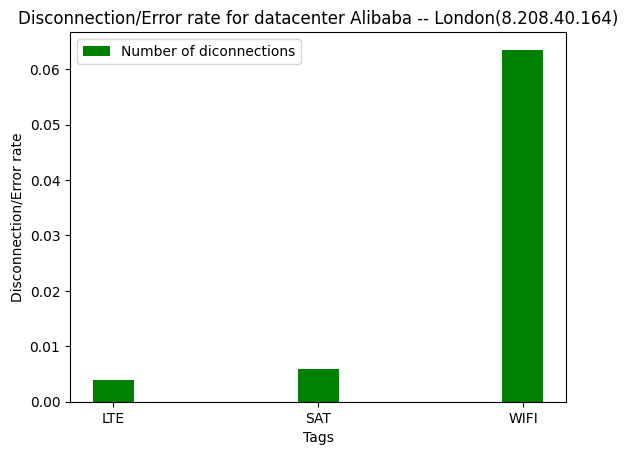

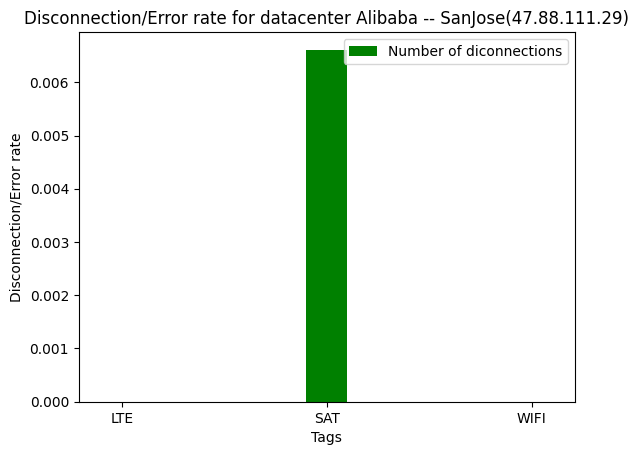

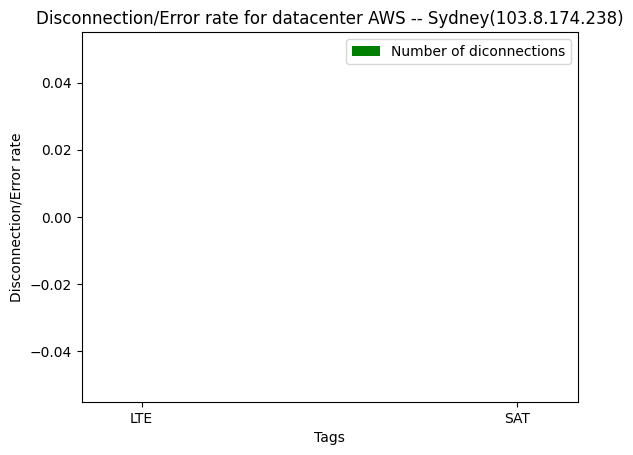

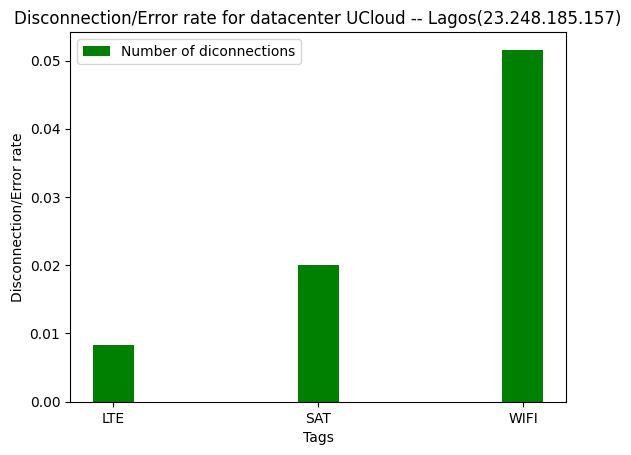

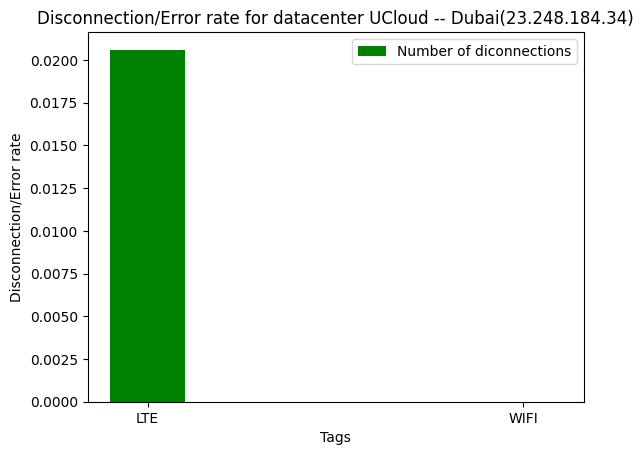

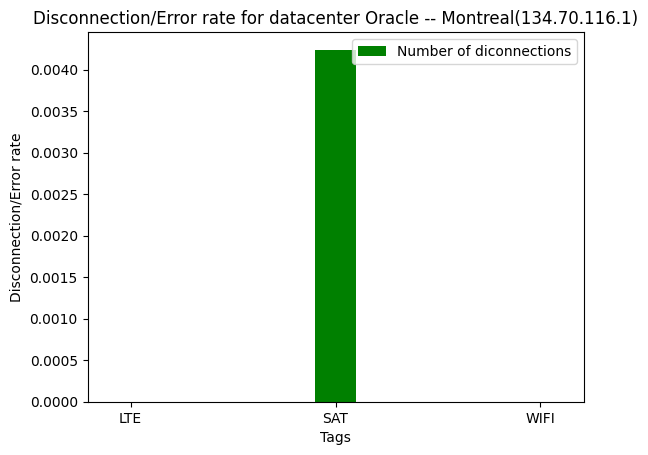

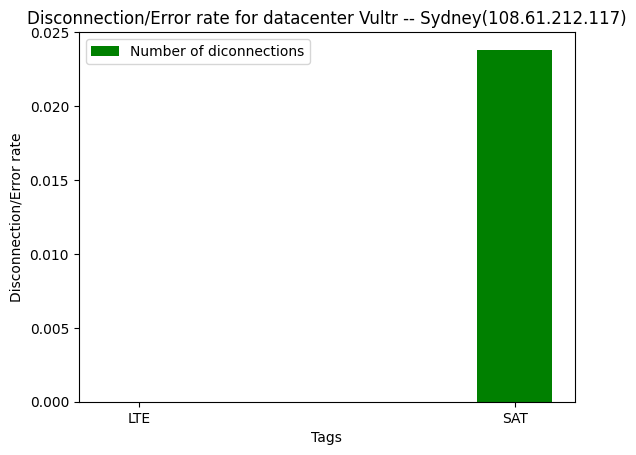

In [15]:
# CREATE ANALYSIS GRAPHS
for each_data_center in analysis_data_centers:
    data_center_name = each_data_center.split(' ')[1] + ' -- ' + each_data_center.split(' ')[2]
    categories = []
    number_of_disconnections = []
    number_of_requests = []
    
    for each_data_tag in range(len(analysis_data_tags)):
        total_number_of_disconnections = 0
        total_number_of_requests = 0
        try: 
            with open('./Question2_Data/' + each_data_center.split(' ')[0] + '_' + analysis_data_tags[each_data_tag] + '.json', 'r') as file:
                json_data = json.load(file)

                for each_probe_result in json_data:
                    for each_packet in each_probe_result['result']:
                        if 'x' in each_packet or 'error' in each_packet:
                            total_number_of_disconnections += 1
                        total_number_of_requests += 1
        except Exception as e:
            continue
        
        categories.append(analysis_data_tags[each_data_tag])
        number_of_disconnections.append(float(total_number_of_disconnections) / float(total_number_of_requests))
    
    bar_width = 0.2
    bar_positions = range(len(categories))
    
    plt.bar(categories, number_of_disconnections, width=bar_width, label='Number of diconnections', color='green')
    
    plt.xlabel('Tags')
    plt.ylabel('Disconnection/Error rate')
    plt.title('Disconnection/Error rate for datacenter ' + data_center_name + '(' + each_data_center.split(' ')[0] + ")")
    
    plt.legend()

    plt.show()

